In this notebook I will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

# Import section

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

2023-11-16 10:33:13.007985: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-16 10:33:13.010386: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 10:33:13.041814: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 10:33:13.041842: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 10:33:13.041859: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

# Dataset Download and take a deep look  

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

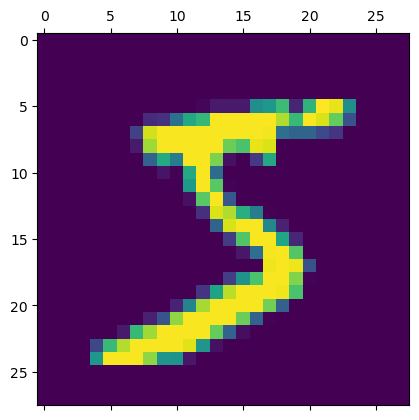

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

# Feature Scaling

We need feature scaling beacuse of dradient decent or any optimization algorithm can have a much simple or state path for its global minimum.

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

By flattening the data, we remove any spatial or temporal structure present in the tensor and convert it into a form that can be processed by densely connected neurons.

We use here reshape to flattened data but we can also flattend data with help of flattened layen in sequasial model.

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Very simple neural network with no hidden layers

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_history = model.fit(X_train_flattened, y_train, epochs=5,validation_data=(X_test_flattened, y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 835us/step - loss: 0.4727 - accuracy: 0.8747 - val_loss: 0.3058 - val_accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 2s 817us/step - loss: 0.3039 - accuracy: 0.9147 - val_loss: 0.2822 - val_accuracy: 0.9214
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9202 - val_loss: 0.2706 - val_accuracy: 0.9251
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9240 - val_loss: 0.2703 - val_accuracy: 0.9250
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9257 - val_loss: 0.2666 - val_accuracy: 0.9246


# Review Traning Results

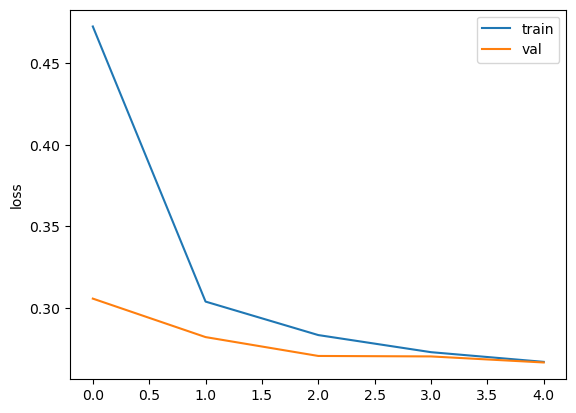

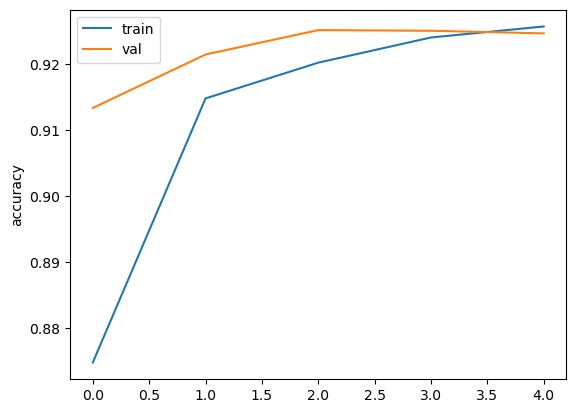

In [16]:
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.9246


[0.2666076719760895, 0.9246000051498413]

In [18]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 925us/step


array([2.3018725e-02, 3.9137393e-07, 7.7242136e-02, 9.5101225e-01,
       3.0076774e-03, 1.2641177e-01, 1.5528120e-06, 9.9984175e-01,
       1.0691203e-01, 7.6925242e-01], dtype=float32)

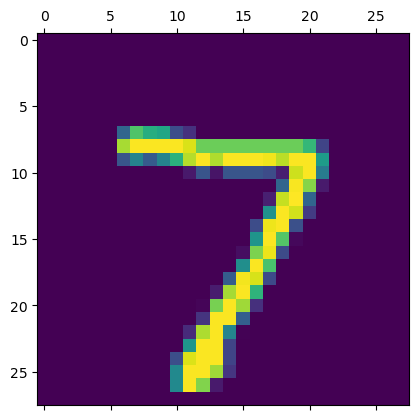

In [19]:
plt.matshow(X_test[0])

## np.argmax finds a maximum element  from an array and returns the index of it

In [20]:
np.argmax(y_predicted[0])

7

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [22]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    2,    1,    0,    9,   10,    4,    3,    1],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   3,    8,  933,   10,    9,    7,   11,   11,   36,    4],
       [   2,    0,   26,  888,    1,   45,    1,   16,   23,    8],
       [   1,    1,    5,    0,  927,    0,   10,    4,    7,   27],
       [   7,    2,    3,   15,   11,  802,   12,    6,   27,    7],
       [   7,    3,    6,    1,    8,   16,  912,    2,    3,    0],
       [   1,    5,   24,    2,   10,    0,    0,  955,    2,   29],
       [   5,    8,    9,   15,   10,   39,    8,   12,  859,    9],
       [   6,    7,    2,    7,   38,   11,    0,   27,    6,  905]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

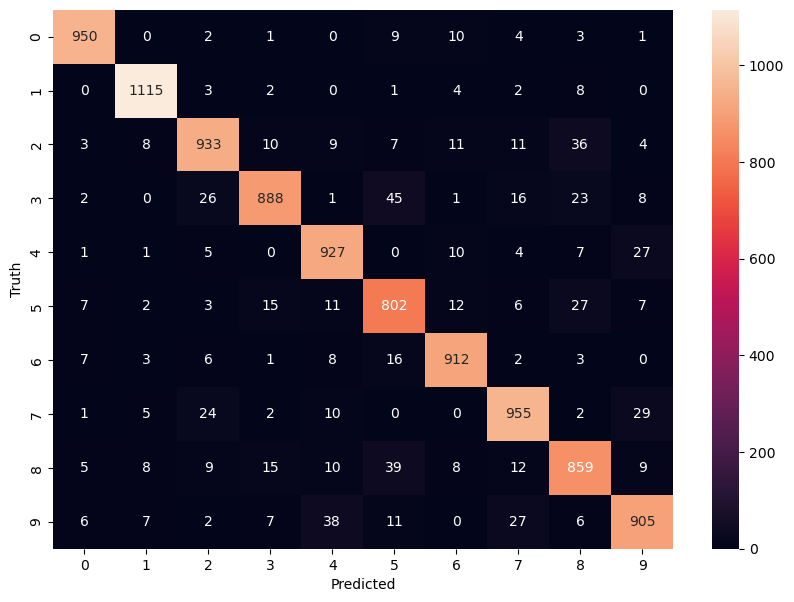

In [24]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using hidden layer

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_history = model.fit(X_train_flattened, y_train, epochs=5,validation_data=(X_test_flattened, y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9228 - val_loss: 0.1589 - val_accuracy: 0.9509
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1255 - accuracy: 0.9627 - val_loss: 0.1105 - val_accuracy: 0.9685
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0878 - accuracy: 0.9741 - val_loss: 0.0925 - val_accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9800 - val_loss: 0.0868 - val_accuracy: 0.9745
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.0815 - val_accuracy: 0.9744


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9744


[0.08152130991220474, 0.974399983882904]

# Review Traning Results

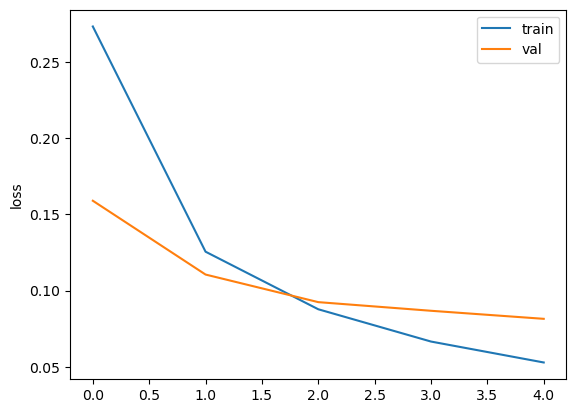

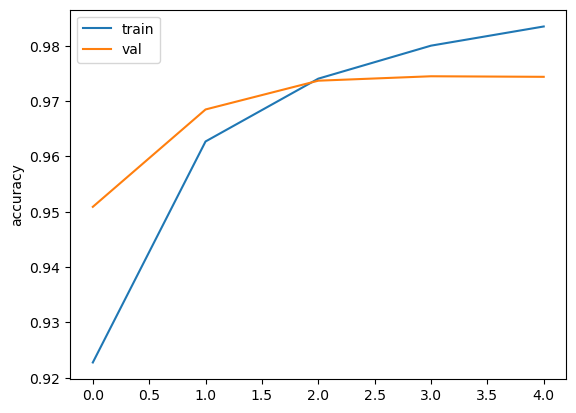

In [27]:
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 0s 939us/step


Text(95.72222222222221, 0.5, 'Truth')

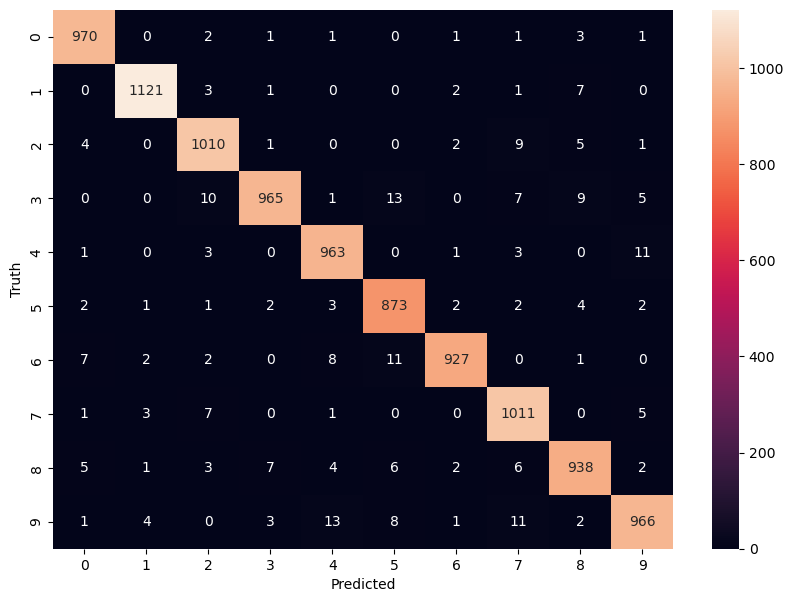

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2706 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1260 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0873 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0539 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0228 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9741


[0.0902804359793663, 0.9740999937057495]